In [1]:
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats

In [2]:
df = pd.read_csv ('Housing.csv')
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


### Task 1 

In [3]:
# Univariate Analysis
avg =df['price'].mean()
print("Mean= " , avg)
sd=df['price'].std()
print("Standard Deviation = " ,sd)
var=sd**2
print("Variance = " ,var)
Zscore=abs(stats.zscore(df['price']) )
print("Z-Score = " ,Zscore)

Mean=  1058779.8678899081
Standard Deviation =  667148.2157118549
Variance =  445086741727.51166
Z-Score =  [6.10794031e-01 3.09829406e+00 6.91809926e-01 1.40025670e-01
 2.57282279e-01 9.01274625e-01 1.58326082e+00 1.01180471e+00
 1.50350517e+00 1.53513138e+00 6.20823782e-02 2.26838306e-01
 5.86908949e-01 3.22881545e-01 6.16699190e-01 4.53599191e-01
 1.11540903e+00 1.00384714e+00 6.80671344e-01 3.69138224e-01
 7.40923165e-01 7.92689321e-01 1.07917353e+00 1.71999165e+00
 6.76094626e-02 1.77092763e-02 3.04922843e+00 6.09314344e-01
 2.61819169e-01 6.39779718e-01 2.68234427e-01 1.31318383e+00
 4.25825742e-01 1.43493954e-01 2.91687028e-01 6.59199528e-01
 1.96081589e+00 1.34883083e+00 1.12153023e+00 1.76017553e+00
 1.04972397e-01 1.94948445e-01 2.56901422e+00 1.02342299e+00
 3.01142101e+00 2.97671020e+00 6.20443924e-01 1.00936823e+00
 3.14995998e-01 4.62135469e-01 1.69752324e+00 1.16437864e+00
 1.97266522e+00 7.10929677e-01 2.05000021e-01 5.21560344e-02
 6.33814151e-01 2.31384416e+00 1.98493

### Task 2

In [4]:
# Encoding the data before using classifier 

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',  'airconditioning', 'prefarea','furnishingstatus' ]
df[features]= df[features].apply(enc.fit_transform)
df[features]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


In [5]:
# Apply Classifier 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

X=df.iloc[:,:-1]
y=df['furnishingstatus']

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred, average='macro')*100)

Accuracy:  35.76642335766424
F1 Score: 34.86341244961935


### Task 3 

In [16]:
# Normalizing the Data 
ndf = (X-X.mean())/X.std()
ndf

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0.610233,-0.432806,0.363078,-0.918094,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284
1,3.095450,0.860437,1.313505,-0.088078,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526
2,0.691175,0.767416,-0.277280,1.509702,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284
3,0.139897,-0.046068,-1.059192,1.447451,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284
4,-0.257046,-0.631811,-0.243577,-0.717507,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.020613,-0.922740,-0.466018,-0.987262,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,-0.553526
541,-0.862920,-0.457349,-0.284021,-0.406251,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526
542,-1.041004,-0.982920,-1.113117,-0.399334,-1.307661,-0.569663,-0.928544,0.405251,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526
543,-0.486578,0.653337,0.208044,0.686603,0.047235,-0.569663,-0.928544,-2.463081,-0.464888,-0.733865,-0.219063,-0.678439,-0.805002,-0.553526


In [35]:
X_train, X_test,y_train, y_test = train_test_split(ndf,y, test_size=0.25, shuffle=True)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred, average='macro')*100)

Accuracy:  49.416058394160586
F1 Score: 48.978095562365226


### Task 4
#### Classifiers perform better on the normalized data as all the features were given equal weights 

### Task 5

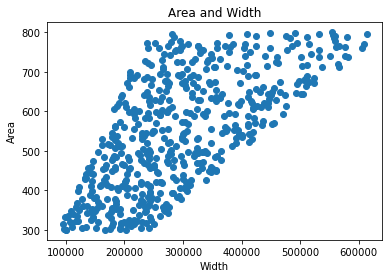

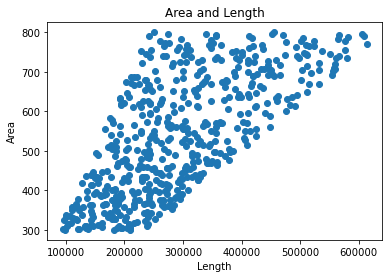

In [54]:
#2D Plotting
import matplotlib.pyplot as plt
plt.scatter(df['area'], df['width'])
plt.title("Area and Width") 
plt.xlabel("Width") 
plt.ylabel("Area") 
plt.show()

plt.scatter(df['area'], df['length'])
plt.title("Area and Length") 
plt.xlabel("Length") 
plt.ylabel("Area") 
plt.show()

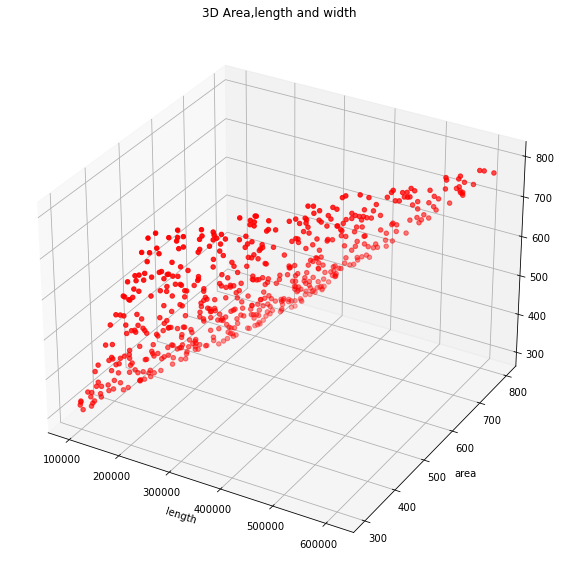

In [55]:
# 3D plotting 
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot( projection='3d')

ax.scatter(df['area'], df['width'], df['length'], c='red')
plt.title("3D Area,length and width") 
plt.xlabel("length") 
plt.ylabel("area") 
plt.show()

### Task 6 

In [56]:
# Fidning covariance and correlation matrix 

covar=np.cov(df['price'],df['area'],bias=True)
print("Covariance Matrix: ")
print(covar)

Covariance Matrix: 
[[4.44270069e+11 4.57497125e+10]
 [4.57497125e+10 1.27517602e+10]]


In [57]:
correl=np.corrcoef(df['price'],df['area'])
print("Corelation Matrix: ")
print(correl)

Corelation Matrix: 
[[1.        0.6078267]
 [0.6078267 1.       ]]


### Task 7 

In [58]:
# finding the correlation of length and area 
np.corrcoef(df['area'],df['length'])

array([[1.        , 0.69595243],
       [0.69595243, 1.        ]])

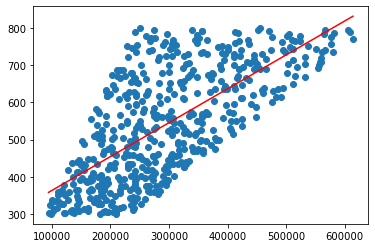

In [59]:
# Plotting the above correlation
import matplotlib.pyplot as plt
plt.scatter(df['area'],df['length'])
plt.plot(np.unique(df['area']), np.poly1d(np.polyfit(df['area'], df['length'], 1))(np.unique(df['area'])), color='red')

### Task 8 

In [60]:
cities = ['A', 'B', 'C', 'D', 'E']
ss = []

for i in cities:
    temp = ""
    temp += i
    temp2 = temp 
    for j in cities:
        temp = temp2
        temp +=j
        temp3  = temp 
        for k in cities:
            temp = temp3
            temp += k 
            ss.append(temp)
    
    
print(len(ss))
print(ss)

125
['AAA', 'AAB', 'AAC', 'AAD', 'AAE', 'ABA', 'ABB', 'ABC', 'ABD', 'ABE', 'ACA', 'ACB', 'ACC', 'ACD', 'ACE', 'ADA', 'ADB', 'ADC', 'ADD', 'ADE', 'AEA', 'AEB', 'AEC', 'AED', 'AEE', 'BAA', 'BAB', 'BAC', 'BAD', 'BAE', 'BBA', 'BBB', 'BBC', 'BBD', 'BBE', 'BCA', 'BCB', 'BCC', 'BCD', 'BCE', 'BDA', 'BDB', 'BDC', 'BDD', 'BDE', 'BEA', 'BEB', 'BEC', 'BED', 'BEE', 'CAA', 'CAB', 'CAC', 'CAD', 'CAE', 'CBA', 'CBB', 'CBC', 'CBD', 'CBE', 'CCA', 'CCB', 'CCC', 'CCD', 'CCE', 'CDA', 'CDB', 'CDC', 'CDD', 'CDE', 'CEA', 'CEB', 'CEC', 'CED', 'CEE', 'DAA', 'DAB', 'DAC', 'DAD', 'DAE', 'DBA', 'DBB', 'DBC', 'DBD', 'DBE', 'DCA', 'DCB', 'DCC', 'DCD', 'DCE', 'DDA', 'DDB', 'DDC', 'DDD', 'DDE', 'DEA', 'DEB', 'DEC', 'DED', 'DEE', 'EAA', 'EAB', 'EAC', 'EAD', 'EAE', 'EBA', 'EBB', 'EBC', 'EBD', 'EBE', 'ECA', 'ECB', 'ECC', 'ECD', 'ECE', 'EDA', 'EDB', 'EDC', 'EDD', 'EDE', 'EEA', 'EEB', 'EEC', 'EED', 'EEE']


In [61]:
# Finding the probability of 2 persons going to the same city 
prob = []
for i in ss:
    t1 = i[-1]
    t2 = i[0]
    t3 = i[1]
    if((t1==t2) or (t1==t3) or (t2==t3)):
        prob.append(i)
print(prob)

['AAA', 'AAB', 'AAC', 'AAD', 'AAE', 'ABA', 'ABB', 'ACA', 'ACC', 'ADA', 'ADD', 'AEA', 'AEE', 'BAA', 'BAB', 'BBA', 'BBB', 'BBC', 'BBD', 'BBE', 'BCB', 'BCC', 'BDB', 'BDD', 'BEB', 'BEE', 'CAA', 'CAC', 'CBB', 'CBC', 'CCA', 'CCB', 'CCC', 'CCD', 'CCE', 'CDC', 'CDD', 'CEC', 'CEE', 'DAA', 'DAD', 'DBB', 'DBD', 'DCC', 'DCD', 'DDA', 'DDB', 'DDC', 'DDD', 'DDE', 'DED', 'DEE', 'EAA', 'EAE', 'EBB', 'EBE', 'ECC', 'ECE', 'EDD', 'EDE', 'EEA', 'EEB', 'EEC', 'EED', 'EEE']


In [62]:
probability = (len(prob)/len(ss))*100
print("The probability of 2 persons going to the same city is: ", probability)

The probability of 2 persons going to the same city is:  52.0


In [63]:
prob2 = []
for i in ss:
    t1 = i[-1]
    t2 = i[0]
    t3 = i[1]
    if((t1!=t2) and (t1!=t3) and (t2!=t3)):
        prob2.append(i)
print(prob2)

['ABC', 'ABD', 'ABE', 'ACB', 'ACD', 'ACE', 'ADB', 'ADC', 'ADE', 'AEB', 'AEC', 'AED', 'BAC', 'BAD', 'BAE', 'BCA', 'BCD', 'BCE', 'BDA', 'BDC', 'BDE', 'BEA', 'BEC', 'BED', 'CAB', 'CAD', 'CAE', 'CBA', 'CBD', 'CBE', 'CDA', 'CDB', 'CDE', 'CEA', 'CEB', 'CED', 'DAB', 'DAC', 'DAE', 'DBA', 'DBC', 'DBE', 'DCA', 'DCB', 'DCE', 'DEA', 'DEB', 'DEC', 'EAB', 'EAC', 'EAD', 'EBA', 'EBC', 'EBD', 'ECA', 'ECB', 'ECD', 'EDA', 'EDB', 'EDC']


In [64]:
probability = (len(prob2)/len(ss))*100
print("The probability of no person going to the same city is: ", probability)

The probability of no person going to the same city is:  48.0


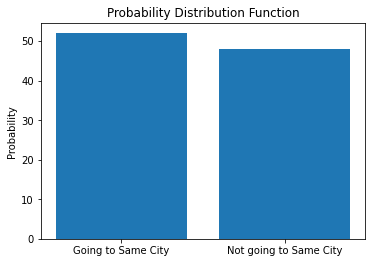

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure()
axis = fig.add_axes([0,0, 0.75, 0.75])
axis.set_ylabel('Probability')
axis.set_title('Probability Distribution Function')
title = ['Going to Same City', 'Not going to Same City']
probs = [52,48]
axis.bar(title,probs)
plt.show()

#### The distribution is discrete 
#### This is a univariate problem 